### **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

###Analyzing mnist dataset 
To proceed further with the convoution, it is always necessary to have a better understanding of how the dataset looks and what could be the prediction dataset.

(60000, 28, 28)


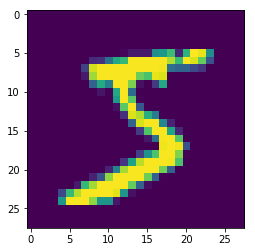

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
plt.imshow(X_train[15])
plt.imshow(X_train[500])
plt.imshow(X_train[3000])

###Data Pre-Processing

Now we need to reshape the images as the model expects. The last number 1 signifies that the image is in greyscale.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

We also need to analyzing the Class array and 'one-hot-encode' them to so that our model could make more sense out of it. 

We can see the sample of class array below:

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

after processing, we can see that the value of 5 is replaced by an array which signifies its value by keeping 1 in the 6th place (array starts by index 0) and rest of the array as 0.

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

###Building the Model

I have built a Sequential model, which allows us to add layers one upon other. We use model.add() to add layers. I am using 3x3 size of kernel for every convolution layer and 2x2 for Maxpooling layers.

I have started with 2 convolution layers with 16 and added a maxpooling layer becasue at this point the receptive field is 5x5 and since the input size is only 24x24, applying maxpooling at this point will not take out too much information.

i am doing another convolution followed by a maxpooling becasue I assume that after convolution, since the receptive field has alerady hit a 12x12, the parts of object is being identified. Further, I have used a 1x1 to integrate multiple feature maps into one channel and creating 10 such channels. Finally the Batch normalization and dropout has been used to get rid of the Ovrefitting issue.

In [10]:
from keras.layers import Activation, BatchNormalization
#from keras.layers.normalization import BatchNormalization
model = Sequential()

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 5))
model.add(BatchNormalization())
model.add(Dropout(.03))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 10)          330       
___________________________

###Compiling the model

Here I am using *adam* optimizer, where I have also used the learning rate 0.002 an momentum as 0.9 so that the model converges slowly to the minima and we see less variance in the accuracy after each epoch.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
             metrics=['accuracy'])

#model.compile(loss='categorical_crossentropy',
 #            optimizer='adam',
  #           metrics=['accuracy'])

###Training the model

Finally we have arrived to the step where we are going to train our model. I have run the model with multiple batch sizes and found that it is performing better at *batch_size =64*. I have set the epochs at 85, only to see how ot performs in a long run. 

The *validation_data* parameter allows the model to perform accuracy test at the end of each epoch.

####We have been successfully able to achieve > 99.40% accuracy on 27th Epoch.
Though it is not the accuracy is varying through-out, we still have been able to cross >99.35% accuracy for a few times.

In [12]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=85, verbose=1, validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 7s 119us/step - loss: 0.3475 - acc: 0.9316 - val_loss: 0.0876 - val_acc: 0.9848
Epoch 2/85
60000/60000 [==============================] - 5s 89us/step - loss: 0.1589 - acc: 0.9553 - val_loss: 0.0888 - val_acc: 0.9832
Epoch 3/85
60000/60000 [==============================] - 5s 90us/step - loss: 0.1215 - acc: 0.9633 - val_loss: 0.0394 - val_acc: 0.9901
Epoch 4/85
60000/60000 [==============================] - 5s 87us/step - loss: 0.1017 - acc: 0.9678 - val_loss: 0.0343 - val_acc: 0.9911
Epoch 5/85
60000/60000 [==============================] - 5s 87us/step - loss: 0.0889 - acc: 0.9723 - val_loss: 0.0363 - val_acc: 0.9910
Epoch 6/85
60000/60000 [==============================] - 5s 86us/step - loss: 0.0750 - acc: 0.9768 - val_loss: 0.0317 - val_acc: 0.9909
Epoch 7/85
60000/60000 [==============================] - 5s 86us/step - loss: 0.0700 - acc: 0.9784 - val_loss: 0.0384 - val_ac

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [14]:
print(score)

[0.030660102597329025, 0.9917]


In [0]:
y_pred = model.predict(X_test)

In [16]:
print(y_pred[:9])
print(y_test[:9])

[[4.78894435e-09 5.83403637e-09 9.93843088e-08 1.02689768e-08
  1.85303470e-08 1.07293663e-09 1.44160976e-08 9.99999881e-01
  4.02884588e-08 9.52809565e-09]
 [7.64183994e-10 1.14436782e-09 9.99999762e-01 2.27464936e-09
  7.37441608e-10 1.81570926e-17 1.94169786e-07 3.05804937e-10
  2.69756073e-14 4.57625965e-10]
 [6.85029722e-09 9.99999285e-01 1.20323262e-08 2.48999807e-08
  4.20052828e-08 1.75027012e-07 6.55154295e-08 4.02854390e-08
  8.60768665e-08 2.90699859e-07]
 [9.99994993e-01 2.18742358e-07 1.32834157e-06 6.23558037e-07
  7.03541545e-08 7.53136220e-08 2.58967621e-08 5.06596081e-08
  1.34708387e-07 2.53761414e-06]
 [3.49100264e-06 6.75417322e-09 1.85358815e-07 2.41103589e-06
  9.99993682e-01 8.22367099e-08 4.52322375e-08 1.11069856e-08
  8.60611138e-08 7.73102471e-08]
 [8.26702120e-08 9.99996543e-01 2.09632006e-07 1.00861676e-07
  6.58524186e-07 1.88860980e-07 1.06239418e-06 6.42790553e-07
  1.68612956e-07 3.18206816e-07]
 [2.02442663e-11 5.37322933e-08 2.20749953e-05 1.21077992e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored